In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import warnings
from itertools import product
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [2]:
 final_hist = pd.read_csv('ML DIVIDED QUESTIONS/HALElifeExpectancyAtBirth.csv')

In [3]:
# Check column names
print("\nColumns in final_hist:")
print(final_hist.columns)


Columns in final_hist:
Index(['Location', 'Period', 'Indicator', 'Dim1', 'First Tooltip'], dtype='object')


In [4]:
# Display basic information about the dataset
print(final_hist.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2196 non-null   object 
 1   Period         2196 non-null   int64  
 2   Indicator      2196 non-null   object 
 3   Dim1           2196 non-null   object 
 4   First Tooltip  2196 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 85.9+ KB
None


In [5]:
final_hist.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Healthy life expectancy (HALE) at birth (years),Both sexes,53.95
1,Afghanistan,2019,Healthy life expectancy (HALE) at birth (years),Male,54.73
2,Afghanistan,2019,Healthy life expectancy (HALE) at birth (years),Female,53.15
3,Afghanistan,2015,Healthy life expectancy (HALE) at birth (years),Both sexes,52.60
4,Afghanistan,2015,Healthy life expectancy (HALE) at birth (years),Male,52.78


In [6]:
# Check for missing values
print(final_hist.isnull().sum())

Location         0
Period           0
Indicator        0
Dim1             0
First Tooltip    0
dtype: int64


In [7]:
# Check for duplicate rows
duplicate_rows = final_hist[final_hist.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [8]:
#No missing values
# Check data types of each column
print(final_hist.dtypes)

Location          object
Period             int64
Indicator         object
Dim1              object
First Tooltip    float64
dtype: object


In [9]:
# Count unique values in each column
unique_counts = final_hist.nunique()
print(unique_counts)

Location          184
Period              4
Indicator           1
Dim1                3
First Tooltip    1492
dtype: int64


In [10]:
# type= object
# List of columns to inspect
columns_to_inspect = ['Location', 'Indicator', 'Dim1']

# Iterate through columns and print unique values
for col in columns_to_inspect:
    unique_values = final_hist[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("\n")

Unique values in column 'Location':
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' 'Côte d’Ivoire' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran (

In [11]:
# Iterate through columns and print value counts
for col in columns_to_inspect:
    value_counts = final_hist[col].value_counts()
    print(f"Value counts for column '{col}':")
    print(value_counts)
    print("\n")

Value counts for column 'Location':
Location
Afghanistan           12
Nepal                 12
New Zealand           12
Nicaragua             12
Niger                 12
                      ..
Germany               12
Ghana                 12
Zimbabwe              12
Sudan                  6
Sudan (until 2011)     6
Name: count, Length: 184, dtype: int64


Value counts for column 'Indicator':
Indicator
Healthy life expectancy (HALE) at birth (years)    2196
Name: count, dtype: int64


Value counts for column 'Dim1':
Dim1
Both sexes    732
Male          732
Female        732
Name: count, dtype: int64




In [12]:
#  Identify outliers using summary statistics (for numerical columns)
final_hist.describe()

,Period,First Tooltip
count,2196.000000,2196.000000
mean,2011.000000,61.394854
std,7.107954,7.683352
min,2000.000000,25.370000
25%,2007.500000,56.240000
50%,2012.500000,63.110000
75%,2016.000000,67.130000
max,2019.000000,75.480000


C:\Users\Merve Balbay\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Merve Balbay\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


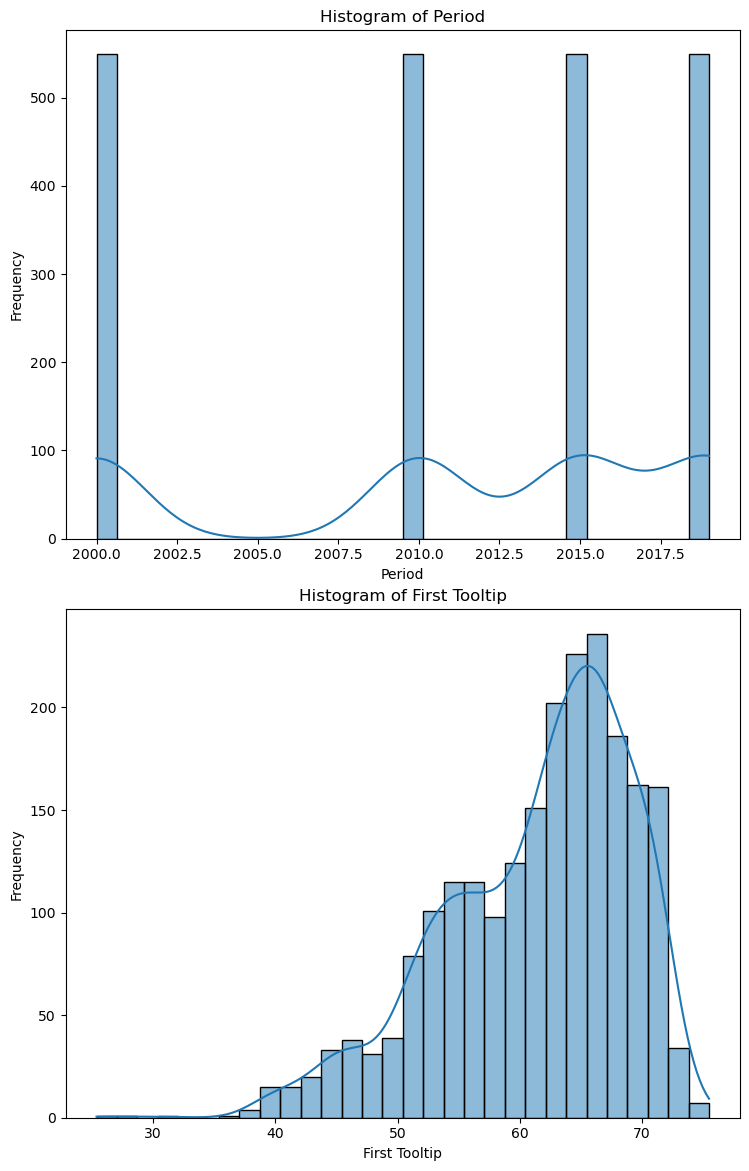

In [13]:
# Select numerical columns for histogram plotting
numerical_columns = ['Period', 'First Tooltip']

# Set up subplots for histograms
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 12))
fig.tight_layout(pad=3.0)  # Adjust spacing between subplots

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(final_hist[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.show()

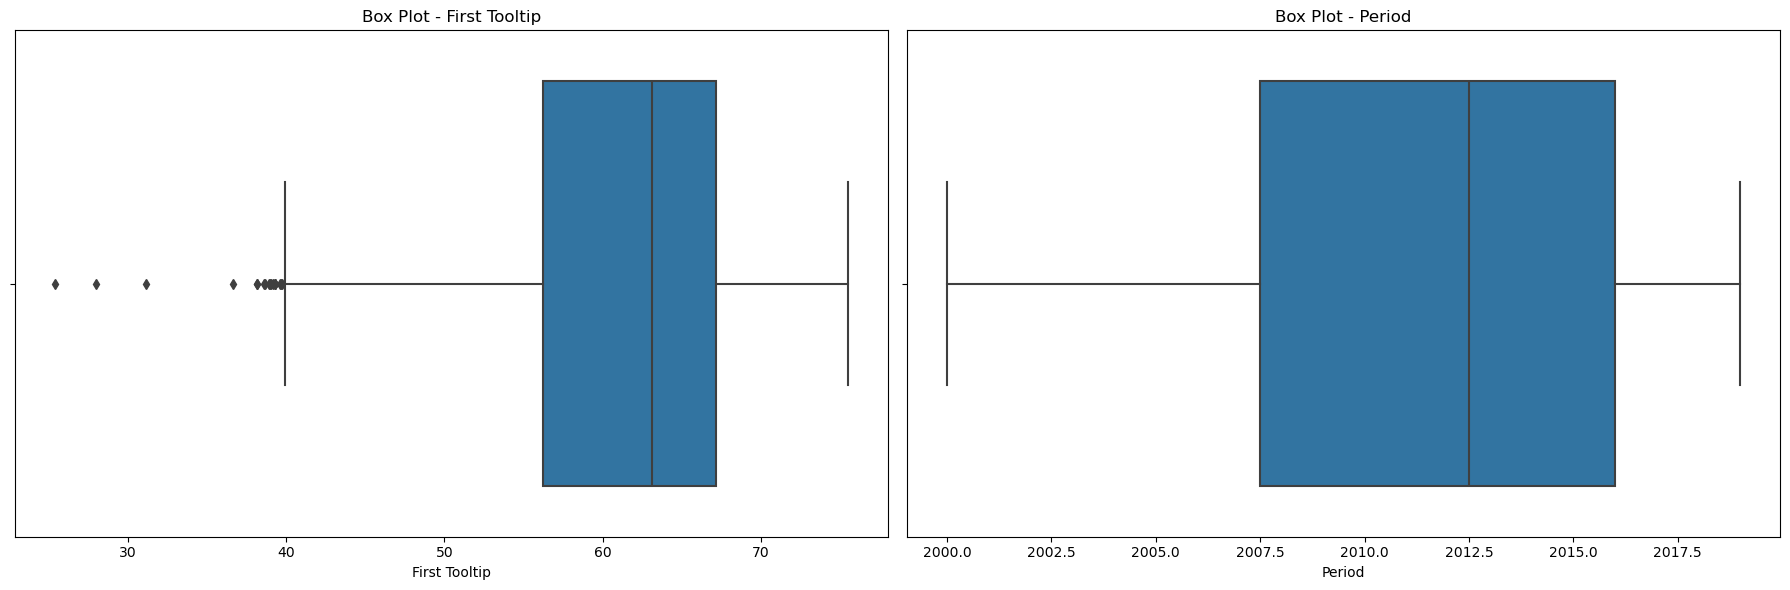

In [14]:
# Box plots 
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # Changed from 1, 2 to 1, 3 for three plots

# Box plot for 'gdp_ppp_pc_usd2011'
sns.boxplot(x=final_hist['First Tooltip'], ax=axs[0])
axs[0].set_title('Box Plot - First Tooltip')

# Box plot for 'population'
sns.boxplot(x=final_hist['Period'], ax=axs[1])
axs[1].set_title('Box Plot - Period')

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
final_hist = pd.read_csv('ML DIVIDED QUESTIONS/HALElifeExpectancyAtBirth.csv')

# Calculate quartiles and IQR
Q1_First_Tooltip = final_hist['First Tooltip'].quantile(0.25)
Q3_First_Tooltip = final_hist['First Tooltip'].quantile(0.75)
IQR_First_Tooltip = Q3_First_Tooltip - Q1_First_Tooltip

Q1_Period = final_hist['Period'].quantile(0.25)
Q3_Period = final_hist['Period'].quantile(0.75)
IQR_Period = Q3_Period - Q1_Period

# Define bounds for 'population', 'Income..net.', and 'gdp_ppp_pc_usd2011' columns
lower_bound_First_Tooltip = Q1_First_Tooltip - 1.5 * IQR_First_Tooltip
upper_bound_First_Tooltip = Q3_First_Tooltip + 1.5 * IQR_First_Tooltip

lower_bound_Period = Q1_Period - 1.5 * IQR_Period
upper_bound_Period = Q3_Period + 1.5 * IQR_Period


# Filtering out the outliers for 'population', 'Income..net.', and 'gdp_ppp_pc_usd2011' columns
filtered_df = final_hist[(final_hist['First Tooltip'] >= lower_bound_First_Tooltip) & (final_hist['First Tooltip'] <= upper_bound_First_Tooltip) &
                         (final_hist['Period'] >= lower_bound_Period) & (final_hist['Period'] <= upper_bound_Period)]

# Show new boxplots for filtered data
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.boxplot(data=filtered_df[['First Tooltip']])
plt.title('First Tooltip (filtered)')
plt.xlabel('First Tooltip')

plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_df[['Period']])
plt.title('Period (filtered)')
plt.xlabel('Period')

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'ML DIVIDED QUESTIONS/HALElifeExpectancyAtBirth.csv'

In [16]:
filtered_df.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Healthy life expectancy (HALE) at birth (years),Both sexes,53.95
1,Afghanistan,2019,Healthy life expectancy (HALE) at birth (years),Male,54.73
2,Afghanistan,2019,Healthy life expectancy (HALE) at birth (years),Female,53.15
3,Afghanistan,2015,Healthy life expectancy (HALE) at birth (years),Both sexes,52.60
4,Afghanistan,2015,Healthy life expectancy (HALE) at birth (years),Male,52.78


In [17]:
filtered_df.describe()

,Period,First Tooltip
count,2178.000000,2178.000000
mean,2011.067952,61.595615
std,7.085991,7.379623
min,2000.000000,39.910000
25%,2010.000000,56.395000
50%,2015.000000,63.185000
75%,2019.000000,67.150000
max,2019.000000,75.480000


In [18]:
#there still seems to be outliers after filtering data so transformation and scaling will be needed 
print(filtered_df.dtypes)

Location          object
Period             int64
Indicator         object
Dim1              object
First Tooltip    float64
dtype: object


In [19]:
# Define categorical columns for encoding
categorical_cols = ['Location', 'Indicator', 'Dim1']

# Apply one-hot encoding using pandas get_dummies
final_df = pd.get_dummies(filtered_df, columns=categorical_cols, drop_first=True)

# Check the updated DataFrame with one-hot encoded columns
print(final_df.head())

   Period  First Tooltip  Location_Albania  Location_Algeria  Location_Angola  \
0    2019          53.95             False             False            False   
1    2019          54.73             False             False            False   
2    2019          53.15             False             False            False   
3    2015          52.60             False             False            False   
4    2015          52.78             False             False            False   

   Location_Antigua and Barbuda  Location_Argentina  Location_Armenia  \
0                         False               False             False   
1                         False               False             False   
2                         False               False             False   
3                         False               False             False   
4                         False               False             False   

   Location_Australia  Location_Austria  ...  Location_Uruguay  \
0       

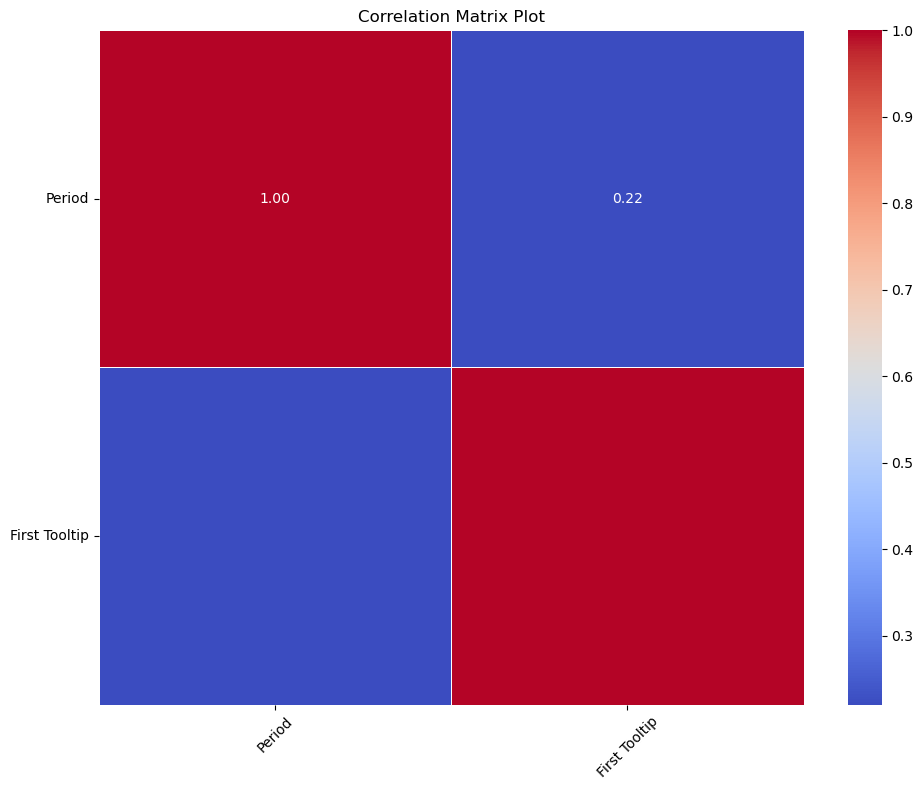

In [20]:
numerical_cols = final_df[['Period', 'First Tooltip']]

# Compute the correlation matrix
corr_matrix = numerical_cols.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Plot')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()